<a href="https://colab.research.google.com/github/Harshavardhan1005/Stock-Price-Prediction/blob/main/Stock_Price_Prediction_using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting how the stock market performs is one of the most difficult things.

Due to various factors involved, it is very difficult to predict with a high degree of accuracy.

Broadly, stock market analysis is divided into two parts 

Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.

Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable.

1. Collect Data
2. Preprocess the data
3. Create stacked LSTM
4. Predict with the test data
5. Plot the output
6. predict the feature 100 days and plot


In [102]:
cd /content/drive/MyDrive/Stock

/content/drive/MyDrive/Stock


In [103]:
### key = 

In [104]:
###import pandas_datareader as pdr
###df = pdr.get_data_tiingo('AAPL',api_key=key)

In [105]:
###df.to_csv('AAPL.csv')

In [133]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [134]:
df = pd.read_csv('AAPL.csv')

In [135]:
df.shape

(1257, 14)

In [136]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-01-14 00:00:00+00:00,99.52,100.4800,95.74,97.96,63170127,23.047696,23.270021,22.172291,22.686417,252680508,0.0,1.0
1,AAPL,2016-01-15 00:00:00+00:00,97.13,97.7100,95.36,96.20,79833891,22.494199,22.628520,22.084287,22.278822,319335564,0.0,1.0
2,AAPL,2016-01-19 00:00:00+00:00,96.66,98.6500,95.50,98.41,53087747,22.385352,22.846214,22.116710,22.790632,212350988,0.0,1.0
3,AAPL,2016-01-20 00:00:00+00:00,96.79,98.1897,93.42,95.10,72334416,22.415459,22.739613,21.635005,22.024074,289337664,0.0,1.0
4,AAPL,2016-01-21 00:00:00+00:00,96.30,97.8800,94.94,97.06,52161463,22.301980,22.667890,21.987020,22.477988,208645852,0.0,1.0


In [137]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-01-05 00:00:00+00:00,131.01,131.7400,128.430,128.89,97664898,131.01,131.7400,128.430,128.89,97664898,0.0,1.0
1253,AAPL,2021-01-06 00:00:00+00:00,126.60,131.0499,126.382,127.72,155087970,126.60,131.0499,126.382,127.72,155087970,0.0,1.0
1254,AAPL,2021-01-07 00:00:00+00:00,130.92,131.6300,127.860,128.36,109578157,130.92,131.6300,127.860,128.36,109578157,0.0,1.0
1255,AAPL,2021-01-08 00:00:00+00:00,132.05,132.6300,130.230,132.43,105158245,132.05,132.6300,130.230,132.43,105158245,0.0,1.0
1256,AAPL,2021-01-11 00:00:00+00:00,128.98,130.1700,128.500,129.19,100620880,128.98,130.1700,128.500,129.19,100620880,0.0,1.0


In [138]:
df1 = df.reset_index()['close']

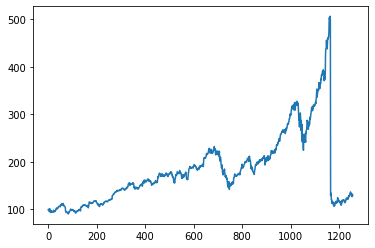

In [139]:
plt.plot(df1)

In [140]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [143]:
print("Training Size: {}".format(int(len(df1)*0.65)))
print("Testing Size: {}".format(len(df1)-int(len(df1)*0.65)))

Training Size: 817
Testing Size: 440


In [ ]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size

In [ ]:
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [114]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):

	data_x, data_y = [], []

	for i in range(len(dataset)-time_step-1): 

		data_x.append(dataset[i:(i+time_step), 0])
		data_y.append(dataset[i + time_step, 0])
  
	return np.array(data_x), np.array(data_y)

In [115]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [116]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [117]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
__________________________________________________

In [119]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=2)

Epoch 1/100
12/12 - 8s - loss: 0.0108 - val_loss: 0.0546
Epoch 2/100
12/12 - 3s - loss: 0.0027 - val_loss: 0.0229
Epoch 3/100
12/12 - 2s - loss: 9.8287e-04 - val_loss: 0.0228
Epoch 4/100
12/12 - 2s - loss: 6.5907e-04 - val_loss: 0.0210
Epoch 5/100
12/12 - 2s - loss: 6.1332e-04 - val_loss: 0.0207
Epoch 6/100
12/12 - 2s - loss: 5.3906e-04 - val_loss: 0.0198
Epoch 7/100
12/12 - 2s - loss: 4.9366e-04 - val_loss: 0.0191
Epoch 8/100
12/12 - 3s - loss: 4.7350e-04 - val_loss: 0.0188
Epoch 9/100
12/12 - 2s - loss: 4.1367e-04 - val_loss: 0.0188
Epoch 10/100
12/12 - 2s - loss: 4.9182e-04 - val_loss: 0.0183
Epoch 11/100
12/12 - 2s - loss: 4.0882e-04 - val_loss: 0.0177
Epoch 12/100
12/12 - 2s - loss: 3.8760e-04 - val_loss: 0.0179
Epoch 13/100
12/12 - 2s - loss: 4.0576e-04 - val_loss: 0.0181
Epoch 14/100
12/12 - 2s - loss: 4.0723e-04 - val_loss: 0.0173
Epoch 15/100
12/12 - 2s - loss: 3.8311e-04 - val_loss: 0.0165
Epoch 16/100
12/12 - 2s - loss: 4.3816e-04 - val_loss: 0.0171
Epoch 17/100
12/12 - 3s -

In [120]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [121]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [122]:
print('RMSE of Train Data:',math.sqrt(mean_squared_error(y_train,train_predict)))

RMSE of Train Data: 158.90292576890104


In [123]:
print('RMSE of Train Data:',math.sqrt(mean_squared_error(y_test,test_predict)))

RMSE of Train Data: 223.58915759664086


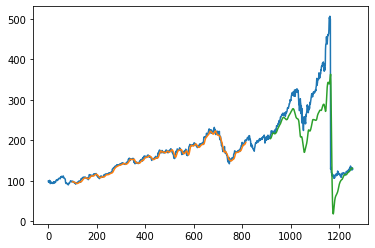

In [124]:
## Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [125]:

x_input=test_data[340:].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [146]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.06361996 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233
 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376
 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476
 0.06316296 0.05017438 0.06008419 0.044546   0.04432952 0.04834636
 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425
 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975
 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09588385 0.09494186
 0.09417766 0.09357405 0.09309397 0.09269919 0.09235834 0.09204923
 0.09175747 0.09147467 0.09119588 0.09091858 0.09064133 0.09036326
 0.0900837  0.08980209 0.08951797 0.089231   0.088

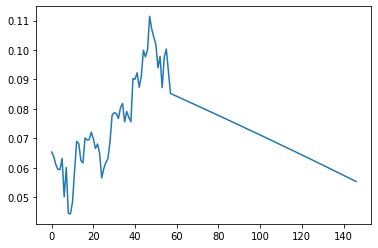

In [147]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [148]:
df3=scaler.inverse_transform(df3).tolist()

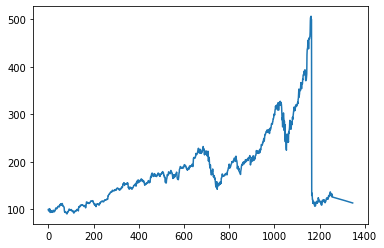

In [149]:
plt.plot(df3)